In this tutorial, we will do a hands-on session of K-nearest neighbors classification algorithm using **scikit-learn**.

Please install the following required libraries for this tutorial -
- numpy
- matplotlib
- seaborn
- scikit-learn

### Load the required libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

### Load the Iris dataset

The iris dataset is a standard dataset already present in scikit-learn. <br>
Load the dataset

In [2]:
iris = datasets.load_iris()

Let's explore the dataset a bit.

In [3]:
iris.data.shape

(150, 4)

So, the dataset has 150 data points each having 4 features. <br>
Let's print the first five data points

In [4]:
print(iris.data[:4, :])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]]


Print the feature names

In [5]:
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


print labels

In [6]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


So, the data points are assigned to three labels (target names) based on the four features (feature names).

Let's choose the first two features (i.e, sepal length and sepal width) for the KNN-algorithm testing.

In [7]:
X = iris.data[:, :2] # The features
y = iris.target # the labels (target)

### The KNN Model

Create a KKN classifier model with nearest neighbor parameter as 15 and fit it to the dataset provided.

In [8]:
k = 15 # The number of nearest neighbors used for classification
clf = neighbors.KNeighborsClassifier(k, weights='uniform')
clf.fit(X, y)

KNeighborsClassifier(n_neighbors=15)

Let's look into the decision boundary. To visualize decision boundary, we need to create a fine 2D mesh and predict the labels on all the data points of the mess and plot them as filled contour.

<IPython.core.display.Javascript object>


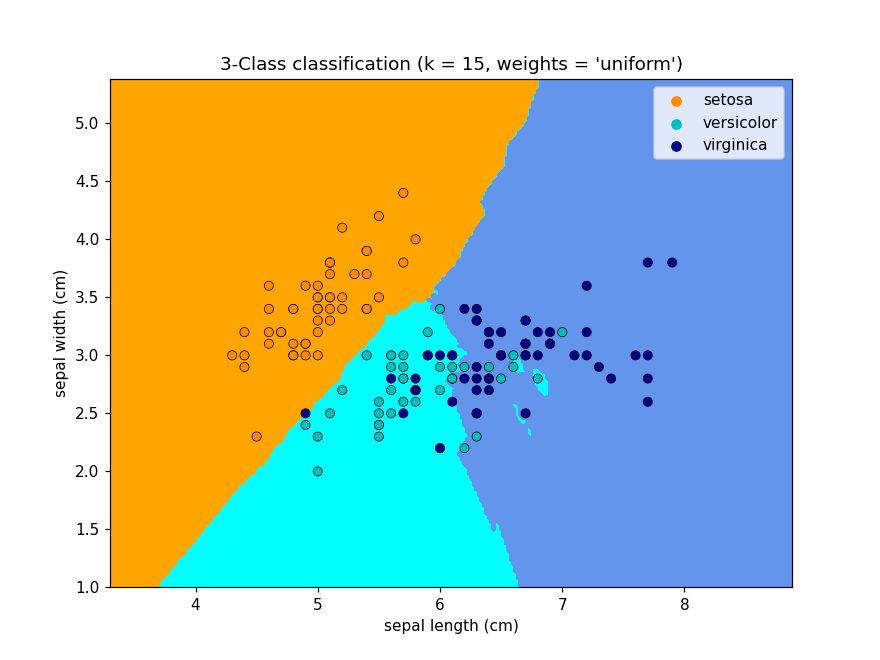

In [9]:
h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

# Create a 2D mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                    np.arange(y_min, y_max, h))

# Predict the labels correspoding to the all the datapoints on the mesh
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Define two color map - one light and one dark
cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
cmap_bold = ['darkorange', 'c', 'darkblue']

Z = Z.reshape(xx.shape)
plt.figure(figsize=(8, 6))

# Plot a filled contour using the mesh points as features and the predicted labels with light color map 
plt.contourf(xx, yy, Z, cmap=cmap_light)

# Plot also the training points with dark color map as scatter plot
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=iris.target_names[y],
                palette=cmap_bold, alpha=1.0, edgecolor="black")
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("3-Class classification (k = %i, weights = 'uniform')"
          % (k))
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.show()

- The KNN model with k=15 performs reasonably well in classifying the data set into three labels (classes) using just two features.
- The decision boundary is quite smooth and clear as can be seen from the plot above. 

### Decision boundary as a function of number of neighbors (k)

Let's have a look into how the decision boundary changes with different k value. In other words, how does the k parameter affects the model's performance.

<IPython.core.display.Javascript object>


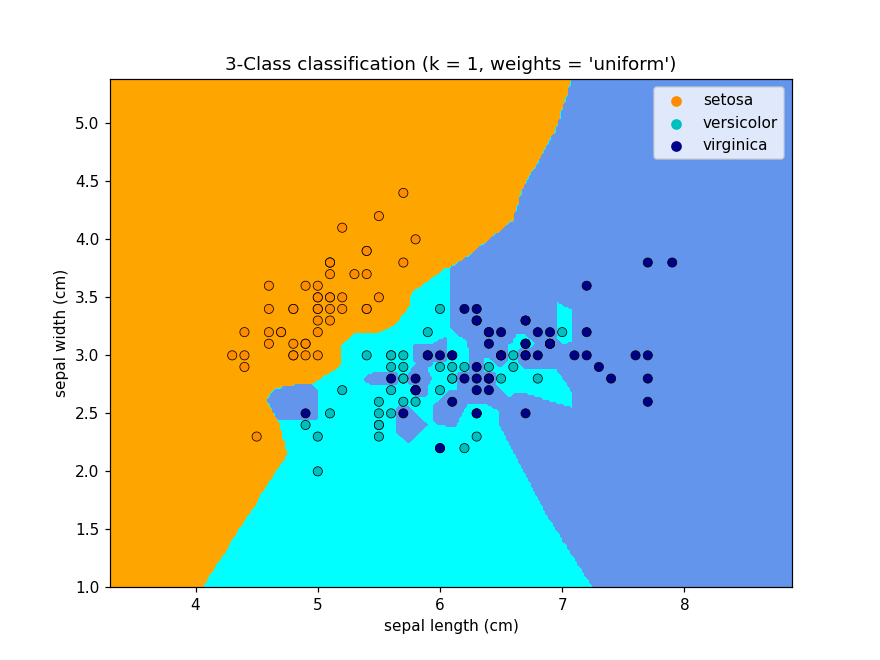

<IPython.core.display.Javascript object>


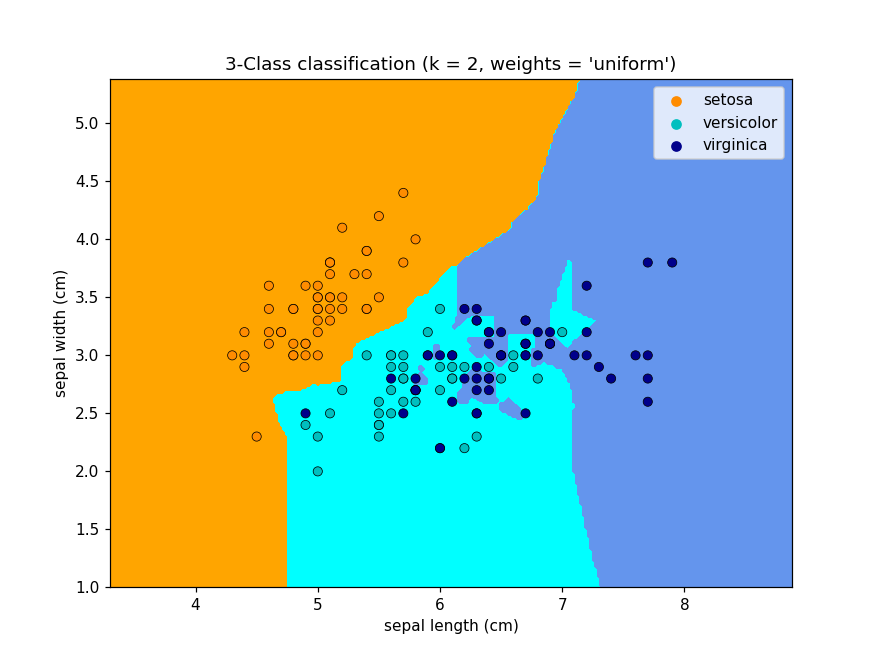

<IPython.core.display.Javascript object>


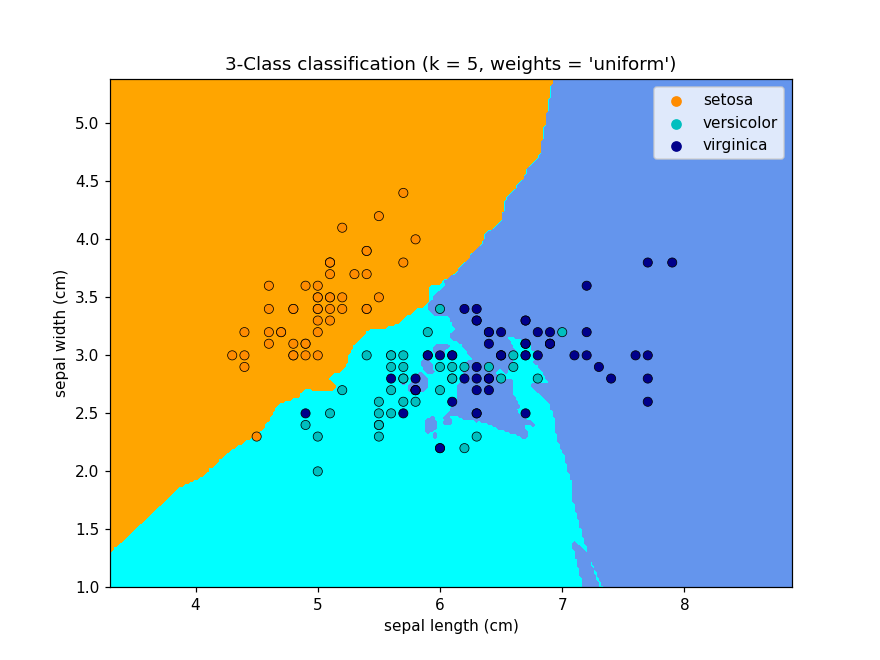

<IPython.core.display.Javascript object>


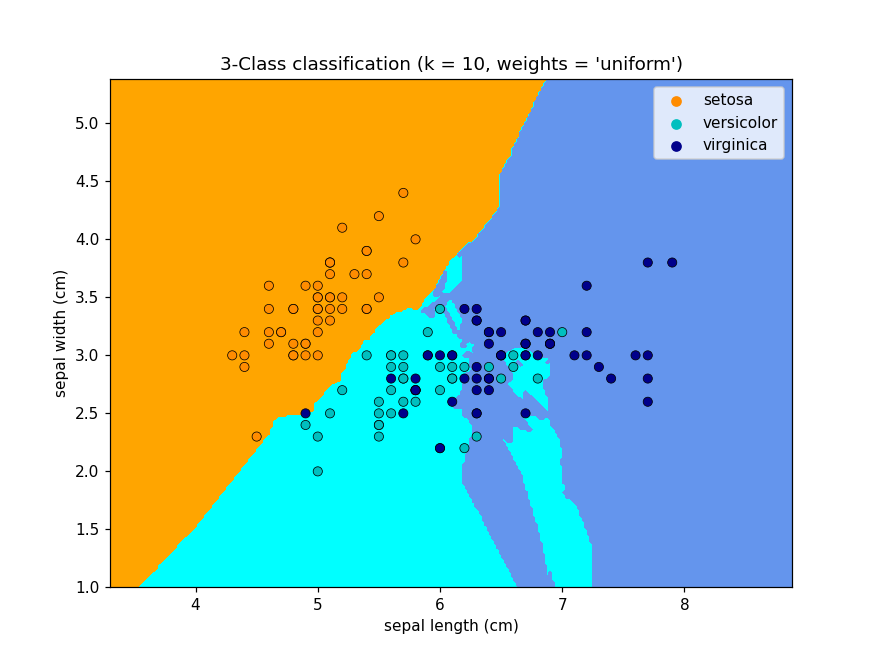

<IPython.core.display.Javascript object>


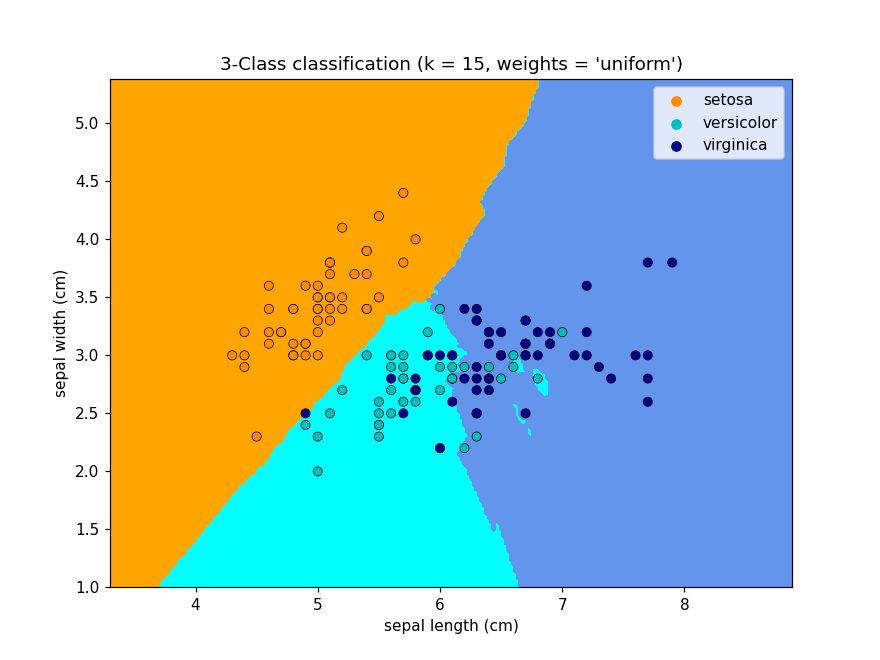

<IPython.core.display.Javascript object>


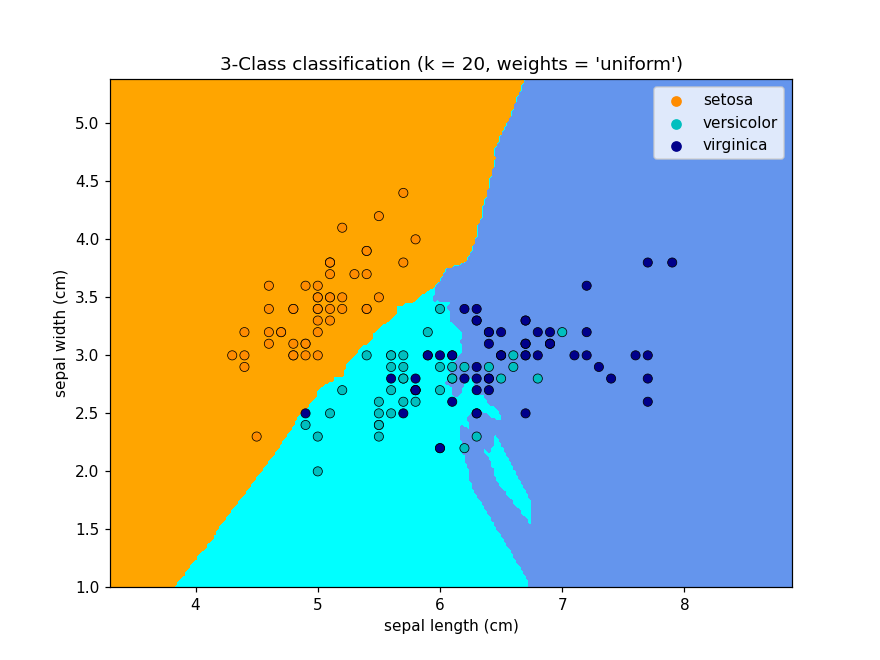

In [10]:
for k in [1, 2, 5, 10, 15, 20]:
    clf = neighbors.KNeighborsClassifier(k, weights='uniform')
    clf.fit(X, y)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                        np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap=cmap_light)    
    # Plot also the training points
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=iris.target_names[y],
                    palette=cmap_bold, alpha=1.0, edgecolor="black")
    plt.xlim([xx.min(), xx.max()])
    plt.ylim([yy.min(), yy.max()])
    plt.title("3-Class classification (k = %i, weights = 'uniform')"
              % (k))
    plt.xlabel(iris.feature_names[0])
    plt.ylabel(iris.feature_names[1])
plt.show()

For smaller value of k, the decision boundaries look complex. For k=1, the KNN tries to assign each point to its respective class and hence making the decision boundary quite complex. For k = 15, the decision boundary looks simplest and also it is able to classify the three classes pretty well. Of all k values considered here, k=15 seems best with clear, simple and smooth boundary.

- Similarly other features can be considered and the KNN algorithm's performance can be explored.
- While training 'uniform' weight is being used. The behavior of KNN algorithm using 'distance' weight can be also be examined.